### Importación de datos



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Los ingresos de cada tienda son los siguientes:

Tienda1 : $  1150.88  millones
Tienda2 : $  1116.34  millones
Tienda3 : $  1098.02  millones
Tienda4 : $  1038.38  millones




Grafico N°1


Text(0.5, 1.0, 'Facturación por tienda')

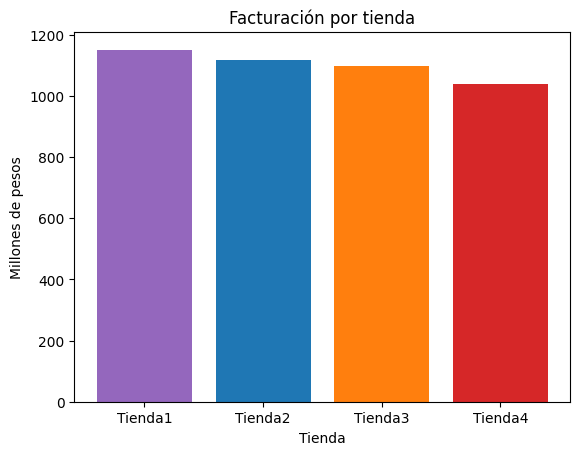

In [27]:
import matplotlib.pyplot as plt


precios_tienda1 = list(tienda['Precio'])
precios_tienda2 = list(tienda2['Precio'])
precios_tienda3 = list(tienda3['Precio'])
precios_tienda4 = list(tienda4['Precio'])

def facturacion(lista) -> float:
  fact=0
  for i in range(len(lista)):
    fact+=lista[i]
  return fact/1000000

facturacion_tienda1 = facturacion(precios_tienda1)
facturacion_tienda2 = facturacion(precios_tienda2)
facturacion_tienda3 = facturacion(precios_tienda3)
facturacion_tienda4 = facturacion(precios_tienda4)

facturacion_tiendas = {'Tienda1':facturacion_tienda1, 'Tienda2':facturacion_tienda2,'Tienda3':facturacion_tienda3,'Tienda4':facturacion_tienda4}
print('Los ingresos de cada tienda son los siguientes:\n')
for t, f in facturacion_tiendas.items():
  print(t,': $ ',"{:.2f}".format(f),' millones')
print('\n')

facturacion_total = facturacion_tienda1+facturacion_tienda2+facturacion_tienda3+facturacion_tienda4


print('\n')
print('Grafico N°1')
plt.bar(facturacion_tiendas.keys(),facturacion_tiendas.values(),color=['tab:purple', 'tab:blue', 'tab:orange', 'tab:red'])
plt.xlabel('Tienda')
plt.ylabel('Millones de pesos')
plt.title('Facturación por tienda')

Gráfico N°2


Text(0.5, 1.0, 'Porcentaje de facturación por tienda')

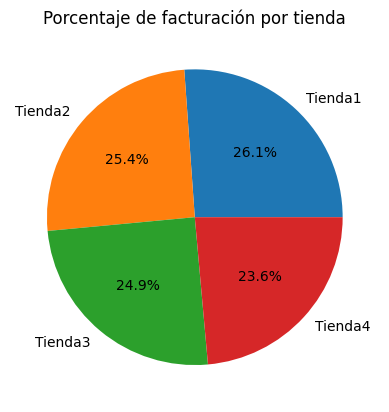

In [28]:
print('Gráfico N°2')
plt.pie(facturacion_tiendas.values(),labels = facturacion_tiendas.keys(),autopct='%1.1f%%')
plt.title('Porcentaje de facturación por tienda')

El porcentaje de ingresos de cada tienda respecto a la media es:
Tienda1 : $  4.54 %
Tienda2 : $  1.40 %
Tienda3 : $  -0.26 %
Tienda4 : $  -5.68 %


Gráfico N°3


Text(0.5, 1.0, 'Variación de facturación respecto a la media')

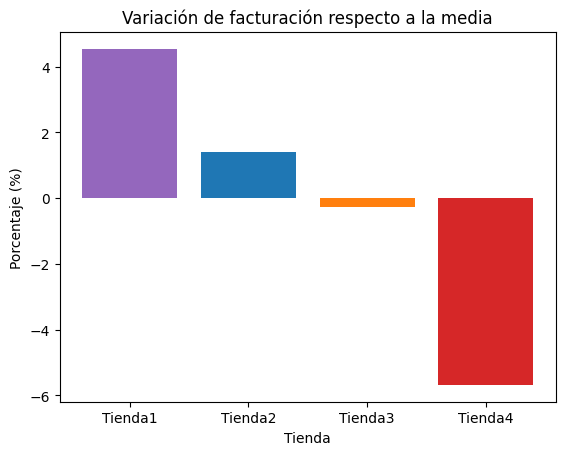

In [36]:
facturacion_total = facturacion_tienda1+facturacion_tienda2+facturacion_tienda3+facturacion_tienda4
promedio_facturacion = facturacion_total/4
facturacion_por_tienda_respecto_media = {'Tienda1':100*(facturacion_tienda1-promedio_facturacion)/promedio_facturacion,'Tienda2':100*(facturacion_tienda2-promedio_facturacion)/promedio_facturacion,'Tienda3':100*(facturacion_tienda3-promedio_facturacion)/promedio_facturacion,'Tienda4':100*(facturacion_tienda4-promedio_facturacion)/promedio_facturacion}
print('El porcentaje de ingresos de cada tienda respecto a la media es:')
for t, f in facturacion_por_tienda_respecto_media.items():
  print(t,': $ ',"{:.2f}".format(f),'%')
print('\n')

print('Gráfico N°3')
plt.bar(facturacion_por_tienda_respecto_media.keys(),facturacion_por_tienda_respecto_media.values(),color=['tab:purple', 'tab:blue', 'tab:orange', 'tab:red'])
plt.xlabel('Tienda')
plt.ylabel('Porcentaje (%)')
plt.title('Variación de facturación respecto a la media')


# 2. Ventas por categoría

In [26]:

categoria_tienda1 = list(tienda['Categoría del Producto'])
categoria_tienda2 = list(tienda2['Categoría del Producto'])
categoria_tienda3 = list(tienda3['Categoría del Producto'])
categoria_tienda4 = list(tienda4['Categoría del Producto'])

def items_vendidos_por_categoria(lista):
  items_por_categoria = []
  for i in range(len(lista)):
    if i==0:
      items_por_categoria.append({'Categoria':lista[i],'Items':1})
    else:
      found = False
      for j in range(len(items_por_categoria)):
        if lista[i]==items_por_categoria[j]['Categoria']:
          items_por_categoria[j]['Items']+=1
          found = True
          break
      if not found:
        items_por_categoria.append({'Categoria':lista[i],'Items':1})
  return items_por_categoria

def orden(e):
  return e['Items']

#def masVendidos(lista):
#  lista1 = lista
#  numeroItems = len(lista1)
#  while numeroItems > 5:
#    lista1.pop()
#    numeroItems = len(lista1)
#  return lista1


items_por_categoria_tienda1 = items_vendidos_por_categoria(categoria_tienda1)
items_por_categoria_tienda1.sort(reverse=True, key=orden)
#ict=masVendidos(items_por_categoria_tienda)
items_por_categoria_tienda2 = items_vendidos_por_categoria(categoria_tienda2)
items_por_categoria_tienda2.sort(reverse=True, key=orden)
#ict2=masVendidos(items_por_categoria_tienda2)
items_por_categoria_tienda3 = items_vendidos_por_categoria(categoria_tienda3)
items_por_categoria_tienda3.sort(reverse=True, key=orden)
#ict3=masVendidos(items_por_categoria_tienda3)
items_por_categoria_tienda4 = items_vendidos_por_categoria(categoria_tienda4)
items_por_categoria_tienda4.sort(reverse=True, key=orden)
#ict4=masVendidos(items_por_categoria_tienda4)


items_vendidos_por_categoria_por_tienda = {'Tienda1':items_por_categoria_tienda1,'Tienda2':items_por_categoria_tienda2,'Tienda3':items_por_categoria_tienda3,'Tienda4':items_por_categoria_tienda4}
print('Las categorias mas vendidos por cada tienda son los siguientes:\n')
for t, it in items_vendidos_por_categoria_por_tienda.items():
  print(t)
  for x in range(5):
    print(it[x]['Categoria'],':',it[x]['Items'])
  print('\n')
  #plt.hist(categoria_tienda1)

Las categorias mas vendidos por cada tienda son los siguientes:

Tienda1
Muebles : 465
Electrónicos : 448
Juguetes : 324
Electrodomésticos : 312
Deportes y diversión : 284


Tienda2
Muebles : 442
Electrónicos : 422
Juguetes : 313
Electrodomésticos : 305
Deportes y diversión : 275


Tienda3
Muebles : 499
Electrónicos : 451
Juguetes : 315
Electrodomésticos : 278
Deportes y diversión : 277


Tienda4
Muebles : 480
Electrónicos : 451
Juguetes : 338
Deportes y diversión : 277
Electrodomésticos : 254




# 3. Calificación promedio de la tienda


In [10]:
calificaciones_tienda1 = list(tienda['Calificación'])
calificaciones_tienda2 = list(tienda2['Calificación'])
calificaciones_tienda3 = list(tienda3['Calificación'])
calificaciones_tienda4 = list(tienda4['Calificación'])

def promedio_calificaciones(lista):
  promedio=0
  for i in range(len(lista)):
    promedio+=lista[i]
  return promedio/len(lista)

promedio_calificaciones_tienda1 = promedio_calificaciones(calificaciones_tienda1)
promedio_calificaciones_tienda2 = promedio_calificaciones(calificaciones_tienda2)
promedio_calificaciones_tienda3 = promedio_calificaciones(calificaciones_tienda3)
promedio_calificaciones_tienda4 = promedio_calificaciones(calificaciones_tienda4)

promedio_calificaciones_por_tienda = {'Tienda1':promedio_calificaciones_tienda1,'Tienda2':promedio_calificaciones_tienda2,'Tienda3':promedio_calificaciones_tienda3,'Tienda4':promedio_calificaciones_tienda4}
print('Media de calificaciones de cada tienda:')
print('Tienda1: ',"{:.2f}".format(promedio_calificaciones_tienda1))
print('Tienda2: ',"{:.2f}".format(promedio_calificaciones_tienda2))
print('Tienda3: ',"{:.2f}".format(promedio_calificaciones_tienda3))
print('Tienda4: ',"{:.2f}".format(promedio_calificaciones_tienda4))

Media de calificaciones de cada tienda:
Tienda1:  3.98
Tienda2:  4.04
Tienda3:  4.05
Tienda4:  4.00


Gráfico N°4


Text(0.5, 1.0, 'Caliificación promedio por tienda')

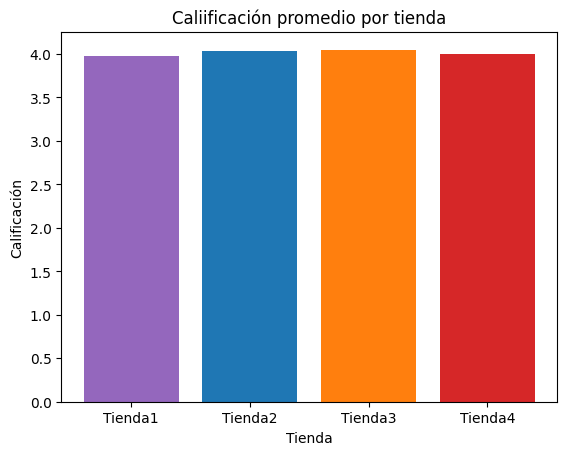

In [31]:
print('Gráfico N°4')
plt.bar(promedio_calificaciones_por_tienda.keys(),promedio_calificaciones_por_tienda.values(),color=['tab:purple', 'tab:blue', 'tab:orange', 'tab:red'])
plt.xlabel('Tienda')
plt.ylabel('Calificación')
plt.title('Caliificación promedio por tienda')

Calificaciones por tipo por tienda:
Tienda 1:
1  estrellas:  319
2  estrellas:  86
3  estrellas:  218
4  estrellas:  444
5  estrellas:  1292

Tienda2:
1  estrellas:  273
2  estrellas:  93
3  estrellas:  209
4  estrellas:  482
5  estrellas:  1302

Tienda3:
1  estrellas:  297
2  estrellas:  79
3  estrellas:  193
4  estrellas:  434
5  estrellas:  1356

Tienda4:
1  estrellas:  310
2  estrellas:  85
3  estrellas:  210
4  estrellas:  453
5  estrellas:  1300

Gráfico N°5


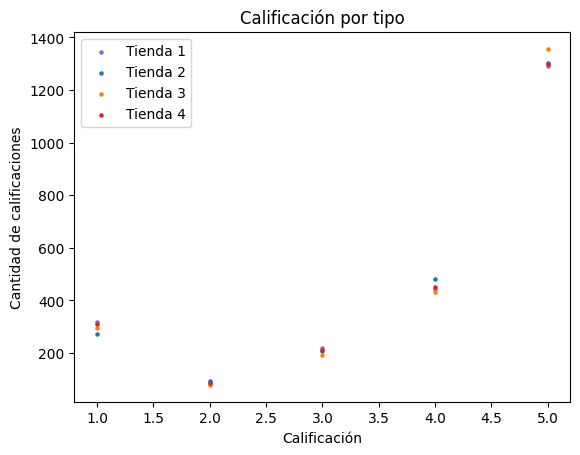

In [32]:
def calificaciones_por_tipo(lista):
  cpt=[0,0,0,0,0]
  for i in range(len(lista)):
    if lista[i]==1:
      cpt[0]+=1
    elif lista[i]==2:
      cpt[1]+=1
    elif lista[i]==3:
      cpt[2]+=1
    elif lista[i]==4:
      cpt[3]+=1
    else:
      cpt[4]+=1
  return cpt

calificaciones_por_tipo_tienda1 = calificaciones_por_tipo(calificaciones_tienda1);
calificaciones_por_tipo_tienda2 = calificaciones_por_tipo(calificaciones_tienda2);
calificaciones_por_tipo_tienda3 = calificaciones_por_tipo(calificaciones_tienda3);
calificaciones_por_tipo_tienda4 = calificaciones_por_tipo(calificaciones_tienda4);

print('Calificaciones por tipo por tienda:')
print('Tienda 1:')
for j in range(len(calificaciones_por_tipo_tienda1)):
  print(j+1,' estrellas: ', calificaciones_por_tipo_tienda1[j])
print('\nTienda2:')
for j in range(len(calificaciones_por_tipo_tienda2)):
  print(j+1,' estrellas: ', calificaciones_por_tipo_tienda2[j])
print('\nTienda3:')
for j in range(len(calificaciones_por_tipo_tienda3)):
  print(j+1,' estrellas: ', calificaciones_por_tipo_tienda3[j])
print('\nTienda4:')
for j in range(len(calificaciones_por_tipo_tienda4)):
  print(j+1,' estrellas: ', calificaciones_por_tipo_tienda4[j])

print('\nGráfico N°5')
plt.scatter([1,2,3,4,5],calificaciones_por_tipo_tienda1,c='tab:purple',s=5)

plt.xlabel('Calificación')
plt.ylabel('Cantidad de calificaciones')
plt.title('Calificación por tipo')

plt.scatter([1,2,3,4,5],calificaciones_por_tipo_tienda2,c='tab:blue',s=5)

plt.scatter([1,2,3,4,5],calificaciones_por_tipo_tienda3,c='tab:orange',s=5)

plt.scatter([1,2,3,4,5],calificaciones_por_tipo_tienda4,c='tab:red',s=5)

plt.legend(['Tienda 1','Tienda 2','Tienda 3','Tienda 4'])

Tipo de calificaciones de cada tienda:
Tienda 1:
Negativas :  405 calificaciones
Neutrales :  218 calificaciones
Positivas :  1736 calificaciones

Tienda2:
Negativas :  366 calificaciones
Neutrales :  209 calificaciones
Positivas :  1784 calificaciones

Tienda3:
Negativas :  376 calificaciones
Neutrales :  193 calificaciones
Positivas :  1790 calificaciones

Tienda4:
Negativas :  395 calificaciones
Neutrales :  210 calificaciones
Positivas :  1753 calificaciones

Gráfico N°6


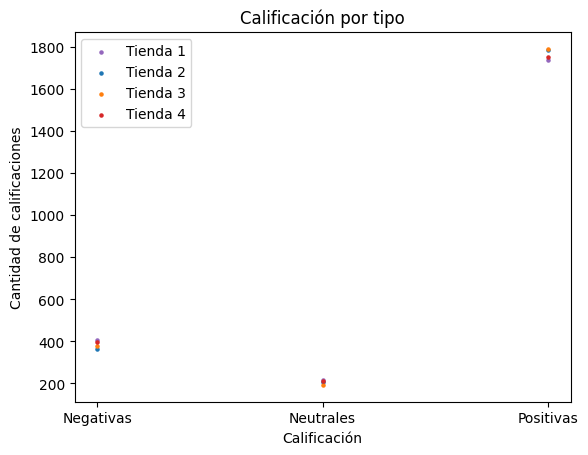

In [33]:
#Agrupación de calificaciones (positivas, neutrales y negativas)

def agrupa_calificaciones(lista):
  agrupa={'Negativas':0,'Neutrales':0,'Positivas':0}
  for i in range(len(lista)):
    if i<2:
      agrupa['Negativas']+=lista[i]
    elif i==2:
      agrupa['Neutrales']+=lista[i]
    else:
      agrupa['Positivas']+=lista[i]
  return agrupa


calificaciones_agrupadas_tienda1 = agrupa_calificaciones(calificaciones_por_tipo_tienda1)
calificaciones_agrupadas_tienda2 = agrupa_calificaciones(calificaciones_por_tipo_tienda2)
calificaciones_agrupadas_tienda3 = agrupa_calificaciones(calificaciones_por_tipo_tienda3)
calificaciones_agrupadas_tienda4 = agrupa_calificaciones(calificaciones_por_tipo_tienda4)

print('Tipo de calificaciones de cada tienda:')
print('Tienda 1:')
for key, value in calificaciones_agrupadas_tienda1.items():
  print(key,': ',value, 'calificaciones')
print('\nTienda2:')
for key, value in calificaciones_agrupadas_tienda2.items():
  print(key,': ',value, 'calificaciones')
print('\nTienda3:')
for key, value in calificaciones_agrupadas_tienda3.items():
  print(key,': ',value, 'calificaciones')
print('\nTienda4:')
for key, value in calificaciones_agrupadas_tienda4.items():
  print(key,': ',value, 'calificaciones')


print('\nGráfico N°6')
plt.scatter(calificaciones_agrupadas_tienda1.keys(),calificaciones_agrupadas_tienda1.values(),c='tab:purple',s=5)

plt.xlabel('Calificación')
plt.ylabel('Cantidad de calificaciones')
plt.title('Calificación por tipo')

plt.scatter(calificaciones_agrupadas_tienda2.keys(),calificaciones_agrupadas_tienda2.values(),c='tab:blue',s=5)

plt.scatter(calificaciones_agrupadas_tienda3.keys(),calificaciones_agrupadas_tienda3.values(),c='tab:orange',s=5)

plt.scatter(calificaciones_agrupadas_tienda4.keys(),calificaciones_agrupadas_tienda4.values(),c='tab:red',s=5)

plt.legend(['Tienda 1','Tienda 2','Tienda 3','Tienda 4'])

# 4. Productos más y menos vendidos

In [11]:
def productosmasvendidos(lista):
  return lista[0:5]

def productosmenosvendidos(lista):
  return lista[len(lista)-5:len(lista)]

def items_vendidos_por_producto(lista):
  productos=[]
  for k in range(len(lista)):
    if k==0:
      productos.append({'Producto':lista[k],'Cantidad':1})
    else:
      found = False
      for j in range(len(productos)):
        if productos[j]['Producto'] == lista[k]:
          productos[j]['Cantidad']+=1
          found=True
          break
      if not found:
        productos.append({'Producto':lista[k],'Cantidad':1})
  return productos

def orden2(e):
  return e['Cantidad']


productos_tienda1 = list(tienda['Producto'])
productos_tienda2 = list(tienda2['Producto'])
productos_tienda3 = list(tienda3['Producto'])
productos_tienda4 = list(tienda4['Producto'])

items_vendidos_por_producto_tienda1 = items_vendidos_por_producto(productos_tienda1)
items_vendidos_por_producto_tienda1.sort(reverse=True, key=orden2)
items_vendidos_por_producto_tienda2 = items_vendidos_por_producto(productos_tienda2)
items_vendidos_por_producto_tienda2.sort(reverse=True, key=orden2)
items_vendidos_por_producto_tienda3 = items_vendidos_por_producto(productos_tienda3)
items_vendidos_por_producto_tienda3.sort(reverse=True, key=orden2)
items_vendidos_por_producto_tienda4 = items_vendidos_por_producto(productos_tienda4)
items_vendidos_por_producto_tienda4.sort(reverse=True, key=orden2)

productos_mas_vendidos_por_tienda = {'Tienda1':productosmasvendidos(items_vendidos_por_producto_tienda1),'Tienda2':productosmasvendidos(items_vendidos_por_producto_tienda2),'Tienda3':productosmasvendidos(items_vendidos_por_producto_tienda3),'Tienda4':productosmasvendidos(items_vendidos_por_producto_tienda4)}

print('Las productoss mas vendidos por cada tienda son los siguientes:')
for t, it in productos_mas_vendidos_por_tienda.items():
  print(t)
  for x in range(len(it)):
    print(it[x]['Producto'],':',it[x]['Cantidad'])
  print('\n')

productos_menos_vendidos_por_tienda = {'Tienda1':productosmenosvendidos(items_vendidos_por_producto_tienda1),'Tienda2':productosmenosvendidos(items_vendidos_por_producto_tienda2),'Tienda3':productosmenosvendidos(items_vendidos_por_producto_tienda3),'Tienda4':productosmenosvendidos(items_vendidos_por_producto_tienda4)}

print('Las productoss menos vendidos por cada tienda son los siguientes:')
for t, it in productos_menos_vendidos_por_tienda.items():
  print(t)
  for x in range(len(it)):
    print(it[x]['Producto'],':',it[x]['Cantidad'])
  print('\n')


Las productoss mas vendidos por cada tienda son los siguientes:
Tienda1
Microondas : 60
TV LED UHD 4K : 60
Armario : 60
Secadora de ropa : 58
Bloques de construcción : 56


Tienda2
Iniciando en programación : 65
Microondas : 62
Batería : 61
Pandereta : 58
Guitarra acústica : 58


Tienda3
Kit de bancas : 57
Mesa de comedor : 56
Cama king : 56
Mesa de noche : 55
Set de ollas : 55


Tienda4
Cama box : 62
Cubertería : 59
Dashboards con Power BI : 56
Cama king : 56
Mesa de noche : 55


Las productoss menos vendidos por cada tienda son los siguientes:
Tienda1
Mochila : 39
Pandereta : 36
Olla de presión : 35
Auriculares con micrófono : 33
Celular ABXY : 33


Tienda2
Auriculares : 37
Sillón : 35
Mesa de comedor : 34
Impresora : 34
Juego de mesa : 32


Tienda3
Vaso térmico : 38
Set de vasos : 36
Mochila : 36
Microondas : 36
Bloques de construcción : 35


Tienda4
Lavadora de ropa : 38
Ciencia de datos con Python : 38
Guitarra acústica : 37
Armario : 34
Guitarra eléctrica : 33




# 5. Envío promedio por tienda

Costo promedio de envío por tienda:
Tienda1 : $  26018.61
Tienda2 : $  25216.24
Tienda3 : $  24805.68
Tienda4 : $  23459.46

Gráfico N°7


Text(0.5, 1.0, 'Costo promedio de los envíos por tienda')

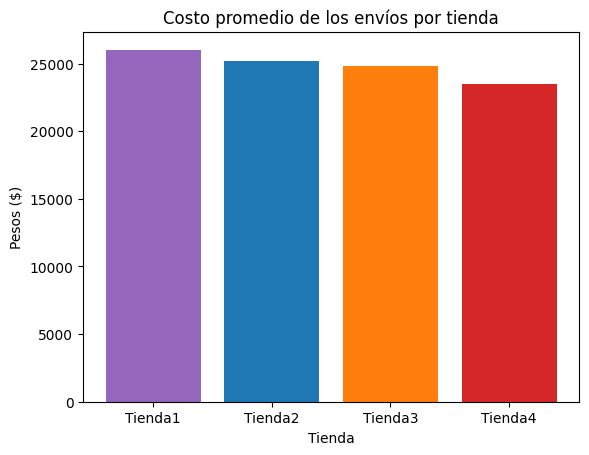

In [34]:
envios_tienda1 = list(tienda['Costo de envío'])
envios_tienda2 = list(tienda2['Costo de envío'])
envios_tienda3 = list(tienda3['Costo de envío'])
envios_tienda4 = list(tienda4['Costo de envío'])

def promedio_envio(lista):
  promedio=0
  for j in range(len(lista)):
    promedio+=lista[j]
  return promedio/len(lista)

total_envios_por_tienda = {'Tienda1':tienda['Costo de envío'].sum()/1000000,'Tienda2':tienda2['Costo de envío'].sum()/1000000,'Tienda3':tienda3['Costo de envío'].sum()/1000000,'Tienda4':tienda4['Costo de envío'].sum()/1000000}


costo_envio_por_tienda = {'Tienda1':promedio_envio(envios_tienda1),'Tienda2':promedio_envio(envios_tienda2),'Tienda3':promedio_envio(envios_tienda3),'Tienda4':promedio_envio(envios_tienda4)}
print('Costo promedio de envío por tienda:')
for key, value in costo_envio_por_tienda.items():
  print(key,': $ ',"{:.2f}".format(value))

print('\nGráfico N°7')
plt.bar(costo_envio_por_tienda.keys(),costo_envio_por_tienda.values(), color=['tab:purple', 'tab:blue', 'tab:orange', 'tab:red'])
plt.xlabel('Tienda')
plt.ylabel('Pesos ($)')
plt.title('Costo promedio de los envíos por tienda')



Peso del costo del envío en cada tienda:
Tienda1 : $  5.33 %
Tienda2 : $  5.33 %
Tienda3 : $  5.33 %
Tienda4 : $  5.33 %

Gráfico N°8


Text(0.5, 1.0, 'Peso del costo del envío en cada tienda')

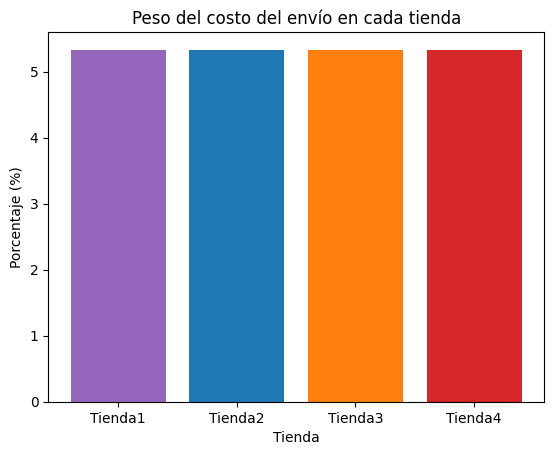

In [35]:
#Peso de los envíos en la facturación de cada tienda (total envíos/facturacion)
peso_envios_por_tienda = {'Tienda1':100*total_envios_por_tienda['Tienda1']/facturacion_tienda1 ,'Tienda2':100*total_envios_por_tienda['Tienda2']/facturacion_tienda2,'Tienda3':100*total_envios_por_tienda['Tienda3']/facturacion_tienda3,'Tienda4':100*total_envios_por_tienda['Tienda4']/facturacion_tienda4}

print('Peso del costo del envío en cada tienda:')
for key, value in peso_envios_por_tienda.items():
  print(key,': $ ',"{:.2f}".format(value),'%')

print('\nGráfico N°8')
plt.bar(peso_envios_por_tienda.keys(),peso_envios_por_tienda.values(),color=['tab:purple', 'tab:blue', 'tab:orange', 'tab:red'])
plt.xlabel('Tienda')
plt.ylabel('Porcentaje (%)')
plt.title('Peso del costo del envío en cada tienda')

Se ha realizado un estudio de las ventas de las 4 tiendas del Sr.Juan para determinar cual de ellas es la menos eficiente. Se han tomado en cuenta los siguientes aspectos:
1. Facturación total de cada una de las tiendas: Tal como puede observarse en las gráficas N°1, 2 y 3, la tienda N°1 es la que facturó mas dinero en el período de tiempo analizado, presentado ventas por 1150.88 millones de pesos, lo cual, representa el 26.1% de la facturación de las 4 tiendas del Sr. Juan y, cuyos ingresos estuvieron 4.54% por encima del promedio de facturación de las 4 tiendas.

Como contraparte, encontramos las tienda N°4 presentando la peor facturación de las tiendas con 1038.38 millones de peso, lo cual, representó el 23.6% de los ingresos del Sr. Juan por motivo de sus tiendas. Además, puede notarse en la gráfica N°3 que, la facturación de dicha tienda estuvo 5.68% por debajo del promedio de ventas de las 4 tiendas.

Finalmente, las tienads N°2 y 3 ocupan las posiciones 2 y 3 respectivamente, con ventas que representan el 25.4% y 24.9% cada una, del total facturado por las tiendas del Sr. Juan.

2. Ventas por categoria: En todas las tiendas destaca la venta de los siguientes tipos de producto, en el orden indicado:

1ero: Muebles

2do: Electrónicos

3ero: Juguetes

4to: Deportes y diversión

5to: Electrodomésticos

3. Calificación enviada por los usuarios a cada tienda: Las encuestas de satisfacción enviadas a los clientes muestran a las tiendas N°3 y 2, como las tiendas con mayor calificación por parte de los clientes con promedio de 4.05 y 4.04 respectivamente. Mientras que, en el tercer y cuarto lugar quedan las tiendas N°4 y 1 con calificación promedio de 4.00 y 3.98 respectivamente (tal infomración puede observarse en el gráfico N°4).

En el gráfico N° 5 se plasmó las cantidad de calificaciones que cada tienda tuvo por tipo, mientras que, en el gráfico N°6 se muestran las calificaciones positivas, negativas y neutrales de cada tienda, tomando como positivas aquelas calificaciones mayores a 3, neutrales aquellas iguales a 3 y negativas las menores a 3. Ambos gráficos muestran a las tiendas N°1 y 4 como aquellas con mas calificaciones negativas, reafirmando lo expuesto en el parrafo anterior.

4. Artículos mas y menos vendidos en cada tienda: como artículos con mas ventas destacan los microondas y las camas king como artículos presentes en el top 5 de artículos mas vendidos en mas de un tienda.

Por su parte, entre los artículos menos vendidos destaca la mochila como en único artículo que aparece en el top 5 de artículos menos vendidos en mas de una tienda.

5. Gastos por motivo de envíos de los productos:los calculos realizados muestran que los gastos de cada tienda por concepto de envíos es proporcional a la facturación, representando un 5.33% de la facturación en cada tienda, tal como puede observarse en la gráfica N°8.

Para efectos de determinar la tienda menos eficiente de todas, los puntos 2 y 4 no aportan información relevante, mientras que el punto N°5 ofrece información no concluyente, ya que, los gastos de envío de cada tienda representan el mismo porcentaje de su facturación, en tal sentido, ninguna tienda está siendo mas o menos eficiente en este punto.

En consecuencia, el análisis se reduce a los puntos N°1 (facturación) y N°3 (calificación de los clientes). Comparando las 4 tiendas en estos dos puntos, se pueden obtener resultados mas concluyentes observando las gráficas N°3, N°4 y N°6, de acuerdo con ellas, tenemos lo siguiente:


Facturación respecto a la media:

1er lugar: Tienda 1 (+4.54%)

2do lugar: Tienda 2 (+1.40%)

3er lugar: Tienda 3 (-0.26%)

4to lugar: Tienda 4 (-5.68%)



Promedio de calificaciones:

1er lugar: Tienda 3 (4.05)

2do lugar: Tienda 2 (4.04)

3er lugar: Tienda 4 (4.00)

4to lugar: Tienda 1 (3.98)



Calificaciones negativas:

1er lugar: Tienda 1 (405 calificaciones)

2do lugar: Tienda 4 (395 calificaciones)

3er lugar: Tienda 3 (376 calificaciones)

4to lugar: Tienda 2 (366 calificaciones)


La tienda N°2 presenta ventas por encima del promedio, y es la tienda con menor número de calificaciones negativas, en tal sentido, queda descartada. Por su parte, la tienda N°3 presenta facturación muy cercana al promedio, y es la tienda con mejor promedio de calificaciones, ante lo cual, también queda descartada.

Finalmente, el análisis se reduce a las tiendas N°1 y N°4. La tienda N°1 es la peor calificada pero, es la que presenta mayor facturación con ventas sobre la media de +4.54%; por su parte, la tienda N°4 es la segunda peor calificada y la que presenta peor desempeño de ventas con un -5.68% respecto al promedio de ventas de las 4 tiendas.

Las ventas de la tienda N°1 superan sobre un 10% las ventas de la tienda N°4, mientras la tienda N°4 supera en calificaciones a la tienda N°1 en 0.5%. La diferencia de calificaciones entre ambas tiendas es bastante baja en comparación con la diferencia en ventas, en tal sentido, la tienda con peor desempeño es la tienda N°4.